<h1> Heart Disease </h1>

# Import 


In [ ]:
# library and Data Manipulation
import pandas as pd
import numpy as np 
# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib.gridspec as gridspec
# Machine Learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, train
from sklearn.neural_network import MLPClassifier
# Evaluating the models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
# Serializing the model 
import pickle

### Import the data

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe(percentiles=[0.1, 0.25, 0.75, 0.9])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis — EDA 


Understand every features in the dataset and check every variable.

In the dataset, verify if contains:
*   Null values;
*   Duplicated values;
*   Outliers. 

In [ ]:
# Nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Duplicados
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
# attemp to do every thing in single code
def return_df(df):
  df.dropna()
  .dropduplicated()
  return df

Which variable is discrete? What is continuous?

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

*   Discrete: cp, fbs, restecg, thal, slope, ca
*   Continuous: age, trestbps, chol, thalach, olpeak
*   Categorical: sex, exang  



**Transform the variable continuous and categorical and Discrete.**

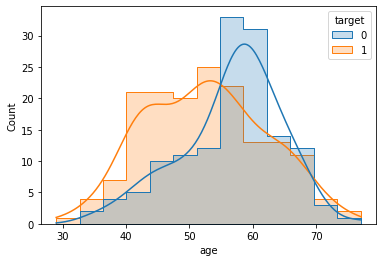

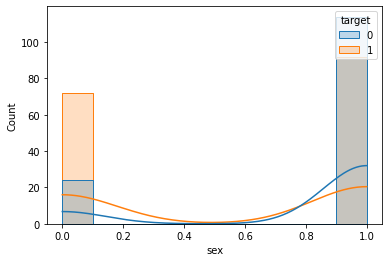

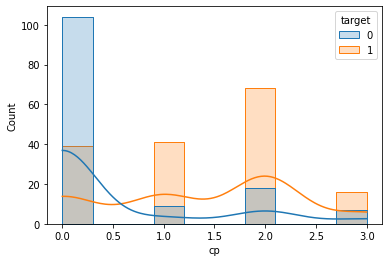

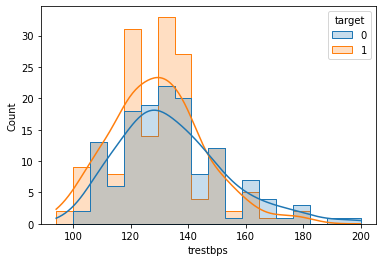

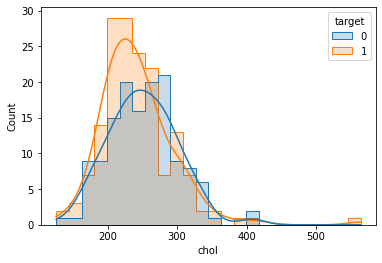

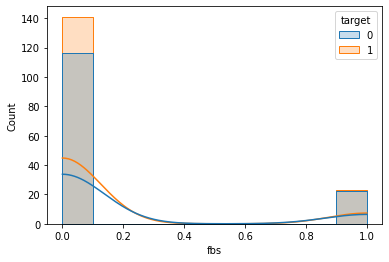

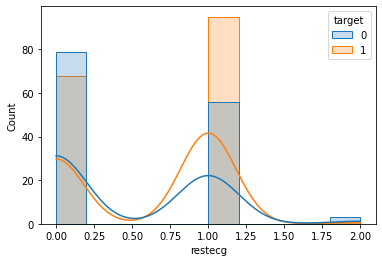

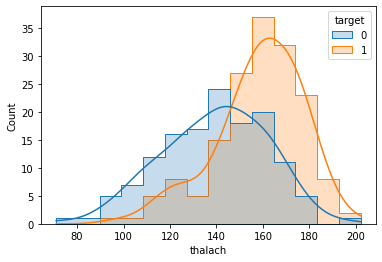

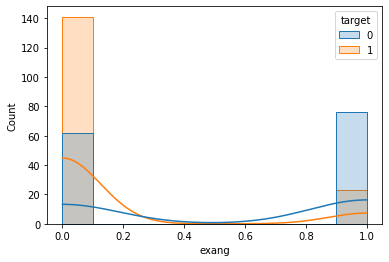

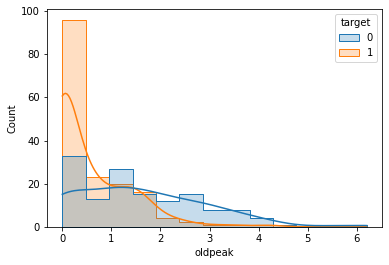

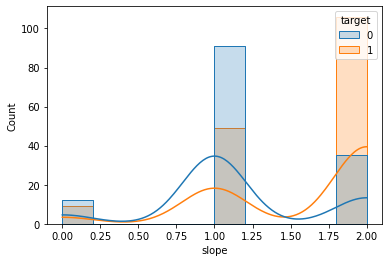

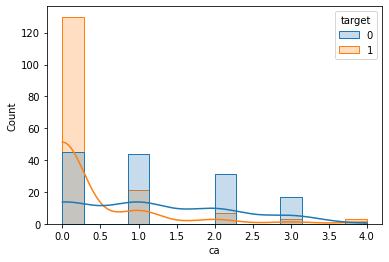

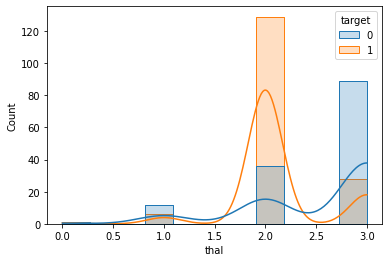

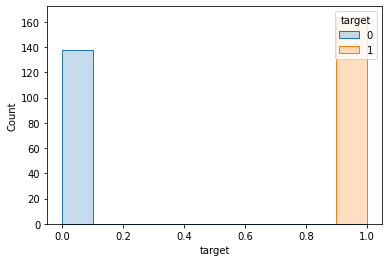

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in df.columns:
    sns.histplot(x=i,data=df, hue='target',kde=True, element="step")  
    plt.figure()

In [ ]:
# Verificando os quartis de distribuição. 
Q1=df[["age", "trestbps", "chol", "thalach", "oldpeak"]].quantile(0.25)
Q3=df[["age", "trestbps", "chol", "thalach", "oldpeak"]].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 age          48.00
trestbps    120.00
chol        211.00
thalach     133.25
oldpeak       0.00
Name: 0.25, dtype: float64
Q3 age          61.00
trestbps    140.00
chol        274.75
thalach     166.00
oldpeak       1.60
Name: 0.75, dtype: float64
IQR age         13.00
trestbps    20.00
chol        63.75
thalach     32.75
oldpeak      1.60
dtype: float64
Normal Range age          28.500
trestbps     90.000
chol        115.375
thalach      84.125
oldpeak      -2.400
dtype: float64 - age          80.500
trestbps    170.000
chol        370.375
thalach     215.125
oldpeak       4.000
dtype: float64


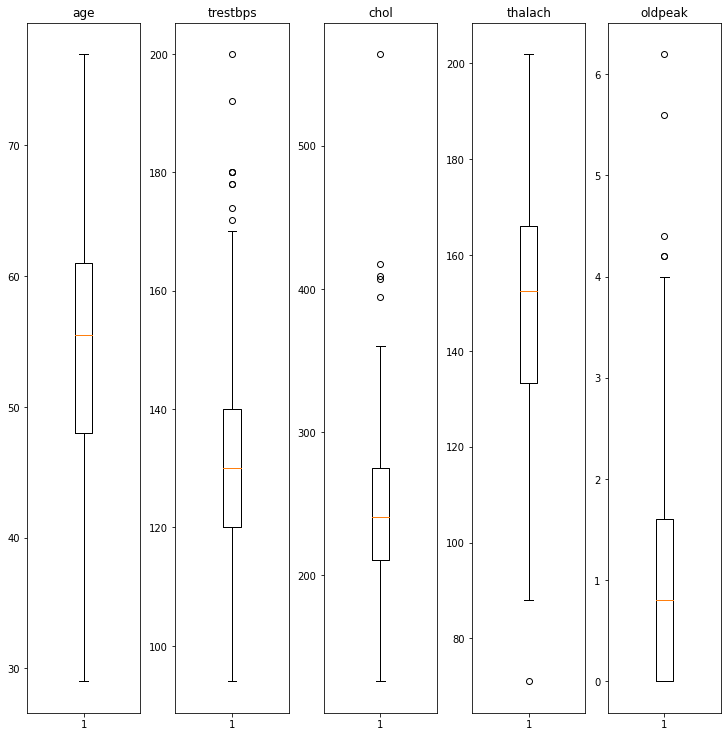

In [ ]:
# Verify the outliers in the continuous variables
#age, trestbps, chol, thalach, olpeak

def draw_boxplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(10, 20))
  gs = gridspec.GridSpec(int(n/5) + 1, 5, figure=fig)
  for i in range(n):
    k = int(i / 5)
    j = i % 5
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.boxplot(df[col])

draw_boxplots(df, ["age", "trestbps","chol",  "thalach", "oldpeak"])

Na coluna de Age não tem outliers, mas nas outras colunas tem! Como tratar? Melhor tratar pela mediana.
In the column ["Age"] we don't have outliers, but in the others have! How to treat them? I'll do by the median.


In [ ]:
median = np.median(df)

In [ ]:
def treat_outliers():
  median = np.median(df)
  df["trestbps"] = df["trestbps"].mask(df["trestbps"] > 170, median)
  median = df.loc[df["trestbps"]<170, "trestbps"].median()
  df.loc[df.trestbps > 170, "trestbps"] = np.nan

  df["chol"] = df["chol"].mask(df["chol"] > 350, median)
  median = df.loc[df["chol"]<350, "chol"].median()
  df.loc[df.chol > 350, "chol"] = np.nan

  df["thalach"] = df["thalach"].mask(df["thalach"] < 80, median)
  median = df.loc[df["thalach"]<80, "thalach"].median()
  df.loc[df.thalach < 80, "thalach"] = np.nan

  df["oldpeak"] = df["oldpeak"].mask(df["oldpeak"] > 4.0, median)
  median = df.loc[df["oldpeak"]< 4.0, "oldpeak"].median()
  df.loc[df.oldpeak > 4.0, "oldpeak"] = np.nan
  return df

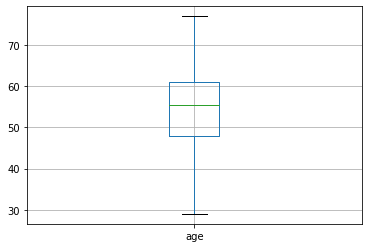

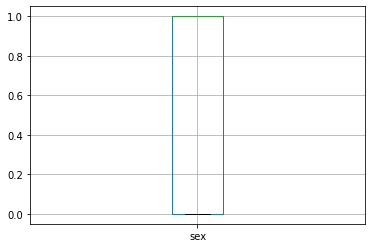

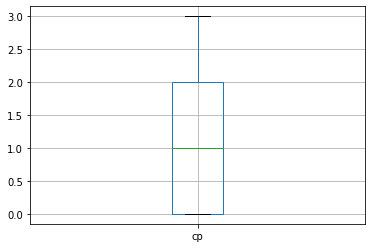

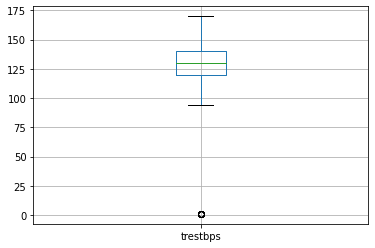

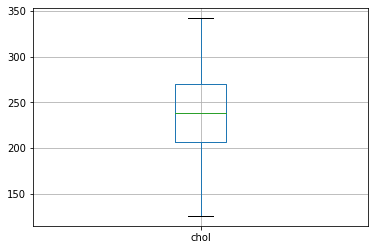

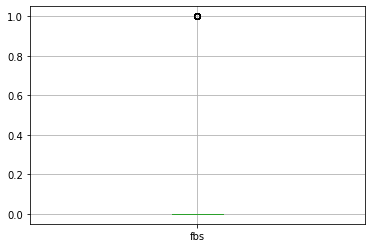

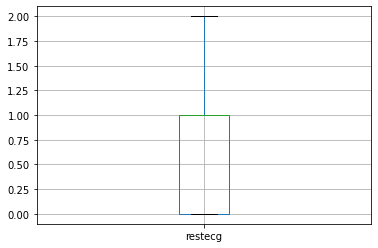

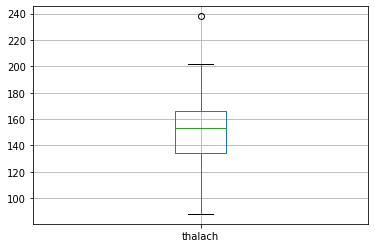

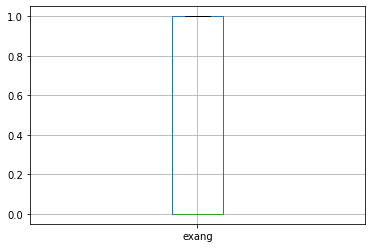

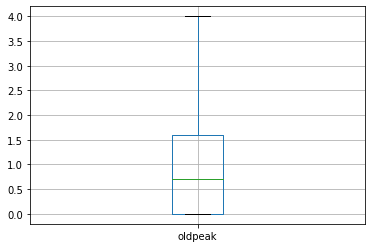

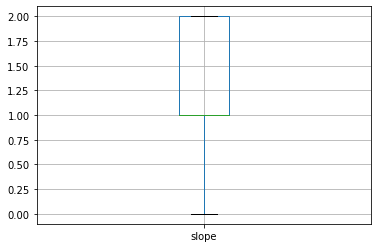

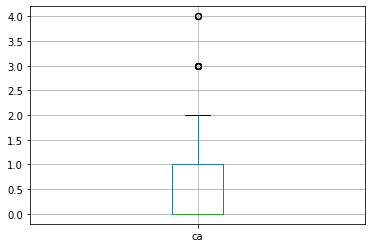

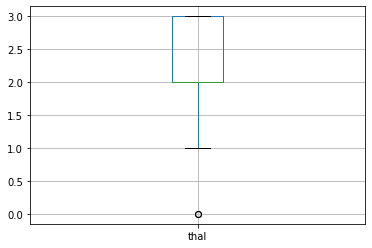

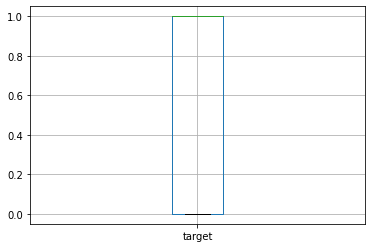

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in df.columns:
    df[df.columns].boxplot(i)
    plt.figure()

## Data Understanding 

Entendendo os dados



*   cp = tipo de dor no peito;  
*   trestbps = pressão arterial;
*   chol = cholesterol (mg/dl);
*   fbs = Nível de açucar no sangue (diabetes);
*   restecg = eletreocardiograma resultados; 
*   thlach = heart rate archieved; 
*   exang = exercicios angina; 
*   oldpeak: Depressão de ST induzida por exercício em relação ao repouso;
*   slope: Tipo de inclinação do segmento ST de pico do exercício;
*   ca: número de vasos sanguínios ressaltados (coloridos por fluoroscopia);
*   thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable defect;
*   target: alvo; 1 = doente, 0 = não doente.



What features can ben created? Is better try to work with the continuous data and create an categorical data. 

*  "age", 
*  trestbps "chol", "thalach", "oldpeak"

In [ ]:
df["sex"].groupby(df["target"]).mean()

target
0    0.826087
1    0.560976
Name: sex, dtype: float64

In [ ]:
df.groupby(df["sex"]).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,123.635417,240.520833,0.125000,0.572917,151.12500,0.229167,0.82000,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,127.427184,238.519417,0.160194,0.504854,149.65534,0.373786,1.05198,1.383495,0.796117,2.402913,0.446602


### Data Construction 

In [ ]:
df["senior"] ='standard'
df.loc[df["age"] >= 55, "senior"]  ='senior'
df.loc[df["age"] <= 55, "senior"]  ='young'

In [ ]:
df["hchol"] ='standard'
df.loc[df["chol"] >= 200, "hchol"]  ='high'
df.loc[df["chol"] < 200, "hchol"]  ='low'

In [ ]:
df['hbp'] = df['trestbps'].apply(lambda x: 'high' if x >= 140.0  else 'standard')
df['hbpm'] = df['thalach'].apply(lambda x: 'high' if x >= 140.0  else 'standard')

In [ ]:
def treatement():
  df.cp = df.cp.map({0:"asymptomatic", 1: "typical chest_pain", 2:"atypical cp", 3:"non-chest pain"})
  df.sex = df.sex.map({0:"Female", 1:"Male"}) 
  df.exang = df.exang.map({0:"exercise did not induce cp", 1:"exercise induced cp"})
  df.slope = df.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
  df.thal = df.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
  df = pd.get_dummies(df, drop_first = True)
  df.head(10)
  return df


# Pandas chained method 
# Example
(
    wine.rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
    .query("alcohol > 14 and color_filter == 1")
    .sort_values("alcohol", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["alcohol", "ci", "hue"]]
) 
# https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

In [ ]:
pd.get_dummies(df, columns=["cp"])

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,senior,hchol,hbp,hbpm,cp_0,cp_1,cp_2,cp_3
0,63,1,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,senior,high,high,high,0,0,0,1
1,37,1,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,young,high,standard,high,0,0,1,0
2,41,0,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,young,high,standard,high,0,1,0,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,senior,high,standard,high,0,1,0,0
4,57,0,120.0,130.0,0,1,163.0,1,0.6,2,0,2,1,senior,low,standard,high,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0,senior,high,high,standard,1,0,0,0
299,45,1,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0,young,high,standard,standard,0,0,0,1
300,68,1,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0,senior,low,high,high,1,0,0,0
301,57,1,130.0,131.0,0,1,115.0,1,1.2,1,1,3,0,senior,low,standard,standard,1,0,0,0


Now the new features have been created we must to transform this data binary type

In [ ]:
df['senior']= df['senior'].map({'young':0, 'senior':1})
df['hchol']= df['hchol'].map({'low':0, 'high':1})
df['hbp']= df['hbp'].map({'standard':0, 'high':1})
df['hbpm']= df['hbpm'].map({'standard':0, 'high':1})

### Data Tranformation

In [ ]:
df['age'] = df['age'].astype(float)
df['cp'] = df['cp'].astype(float)
df['slope'] = df['slope'].astype(float)
df['thal'] = df['thal'].astype(float)

In [ ]:
df['trestbps'] = df['trestbps'].astype(float)
df['chol'] = df['chol'].astype(float)
df['thalach'] = df['thalach'].astype(float)

In [ ]:
df['senior']= df['senior'].astype(float)
df['hchol']= df['hchol'].astype(float)
df['hbp']= df['hbp'].astype(float)
df['hbpm']= df['hbpm'].astype(float)

In [ ]:
df["exang"] = df['exang'].astype(float)
df["fbs"] = df['fbs'].astype(float)
df["sex"] = df['sex'].astype(float) 
df["restecg"] = df['restecg'].astype(float)

In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
senior      float64
hchol       float64
hbp         float64
hbpm        float64
dtype: object

## Data Visualization

In this part of the code I will not create beautiful charts, but I want to check how the data in raw stage.  

In [ ]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,senior,hchol,hbp,hbpm
age,1.000000,-0.094962,-0.063107,0.080058,0.100078,0.119492,-0.111590,-0.359790,0.093216,0.209770,-0.164124,0.302261,0.065317,-0.221476,0.818561,0.073980,0.274278,-0.225527
sex,-0.094962,1.000000,-0.051740,0.066246,-0.019952,0.046022,-0.060351,-0.029783,0.143460,0.103243,-0.032990,0.113060,0.211452,-0.283609,-0.056888,0.052352,0.015235,-0.042880
cp,-0.063107,-0.051740,1.000000,0.047923,-0.064213,0.096018,0.041561,0.269427,-0.392937,-0.136506,0.116854,-0.195356,-0.160370,0.432080,-0.080344,-0.025264,0.058032,0.221912
trestbps,0.080058,0.066246,0.047923,1.000000,-0.070963,-0.051629,-0.123792,-0.055069,-0.101356,0.044110,0.016230,0.093060,-0.076952,-0.007578,0.108956,-0.004875,0.531359,-0.043077
chol,0.100078,-0.019952,-0.064213,-0.070963,1.000000,0.021300,-0.065975,-0.035916,0.071067,-0.021361,0.016629,0.074568,0.047400,-0.123455,0.035090,0.686945,-0.020857,0.010928
fbs,0.119492,0.046022,0.096018,-0.051629,0.021300,1.000000,-0.083081,-0.017204,0.024729,0.031361,-0.058654,0.144935,-0.032752,-0.026826,0.102287,0.011724,0.018160,0.010720
restecg,-0.111590,-0.060351,0.041561,-0.123792,-0.065975,-0.083081,1.000000,0.062708,-0.068807,-0.090660,0.090402,-0.083112,-0.010473,0.134874,-0.132411,-0.080408,-0.087851,0.017240
thalach,-0.359790,-0.029783,0.269427,-0.055069,-0.035916,-0.017204,0.062708,1.000000,-0.392374,-0.335114,0.367332,-0.244400,-0.106816,0.391668,-0.281152,0.028351,-0.084605,0.801855
exang,0.093216,0.143460,-0.392937,-0.101356,0.071067,0.024729,-0.068807,-0.392374,1.000000,0.313451,-0.256106,0.125377,0.205826,-0.435601,0.091702,0.048410,0.017888,-0.337890
oldpeak,0.209770,0.103243,-0.136506,0.044110,-0.021361,0.031361,-0.090660,-0.335114,0.313451,1.000000,-0.536354,0.201581,0.201823,-0.435009,0.224177,-0.052110,0.144925,-0.286172


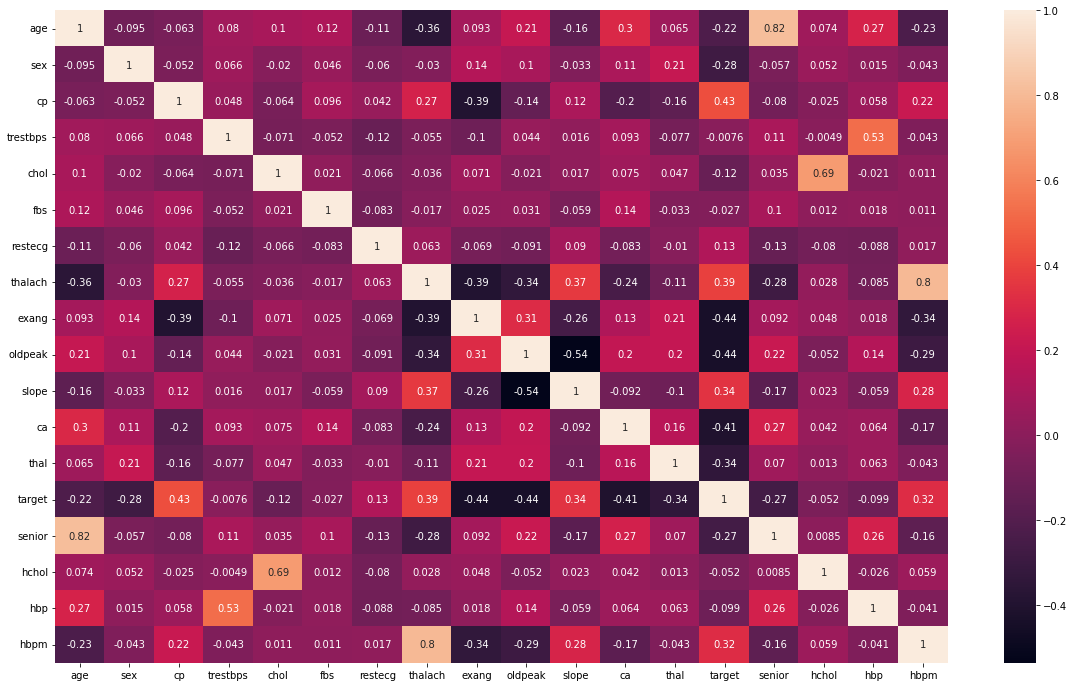

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr, annot = True)

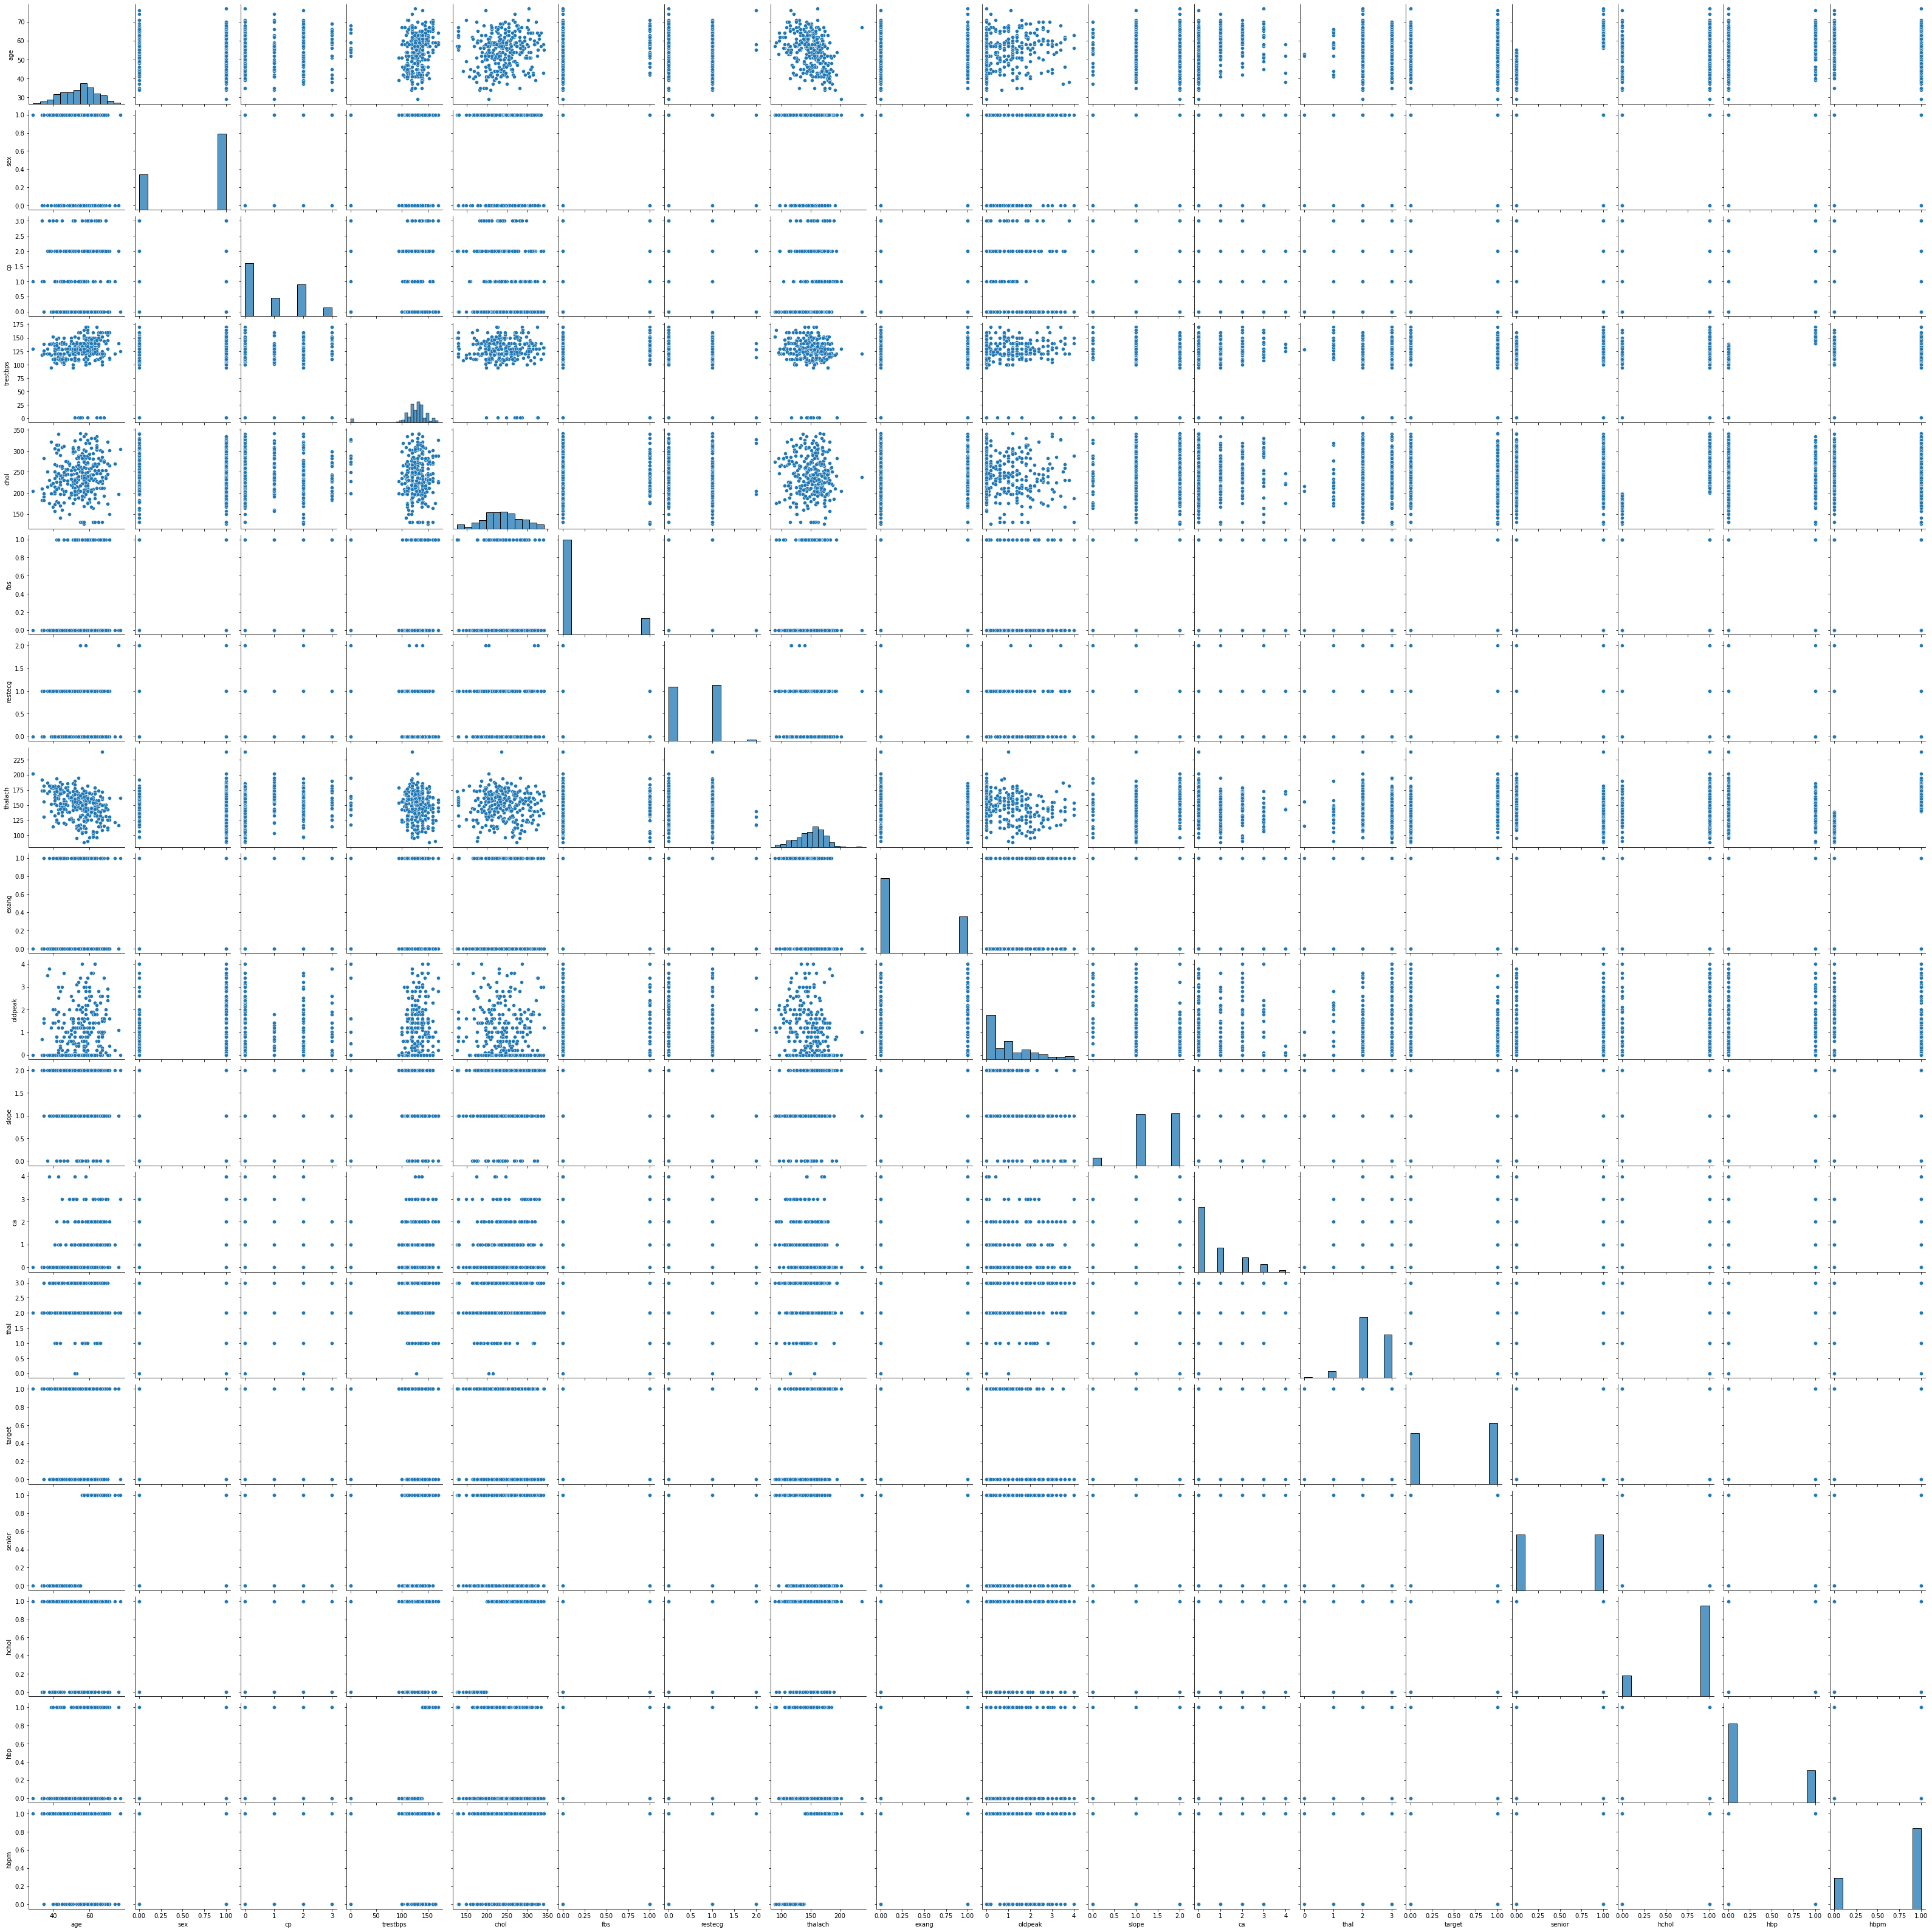

In [ ]:
sns.pairplot(df)

# Machine Learning

### Modeling 

In [ ]:
df = df.dropna()

In [ ]:
#Pacient 
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42) 


models = {'KNN':               KNeighborsClassifier(),  
          'Extra Tree':        ExtraTreesClassifier(),  
          'Random Forest':     RandomForestClassifier(),   
          'XGBoost':           XGBClassifier(), 
          'AdaBoost':          AdaBoostClassifier(),  
          'Gradient Boosting': GradientBoostingClassifier(),  
          'Redes Neurais':     MLPClassifier()}  

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")
  print('-----------------------------------')

Decision Tree
Acccuracy: 69.33333333333334%
Precision: 72.5%
Recall: 70.73170731707317%
F1: 71.60493827160495%
-----------------------------------
Extra Tree
Acccuracy: 86.66666666666667%
Precision: 86.04651162790698%
Recall: 90.2439024390244%
F1: 88.09523809523809%
-----------------------------------
Random Forest
Acccuracy: 82.66666666666667%
Precision: 83.33333333333334%
Recall: 85.36585365853658%
F1: 84.33734939759037%
-----------------------------------
XGBoost
Acccuracy: 82.66666666666667%
Precision: 81.81818181818183%
Recall: 87.8048780487805%
F1: 84.70588235294119%
-----------------------------------
AdaBoost
Acccuracy: 82.66666666666667%
Precision: 83.33333333333334%
Recall: 85.36585365853658%
F1: 84.33734939759037%
-----------------------------------
Gradient Boosting
Acccuracy: 82.66666666666667%
Precision: 81.81818181818183%
Recall: 87.8048780487805%
F1: 84.70588235294119%
-----------------------------------
Redes Neurais
Acccuracy: 80.0%
Precision: 78.26086956521739%
Recal

### hyperparameters

In [ ]:
# Verify  XGBoost 
model = XGBClassifier()
param = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

cv = GridSearchCV(model, param_grid=param, cv=10)
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

XGBClassifier(model_learning_rate=0.001, model_max_depth=3,
              model_n_estimators=100)

In [ ]:
# Checking Random Forest
params_grid = {'n_estimators':[100, 150, 200, 250, 500],
               'criterion':['gini', 'entropy'],
               'max_depth':[None, 1, 2, 3],
               'min_samples_split':[1, 2, 3],
               'max_features':['auto', 'sqrt', 'log2', 2, 3, 4, 5],
               'bootstrap':[True, False]}

RFC = RandomForestClassifier()

grid_search_rfc = GridSearchCV(RFC, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_rfc.fit(X_train, y_train)


Fitting 3 folds for each of 1680 candidates, totalling 5040 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1680 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobli

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 500]},
             verbose=2)

In [ ]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 250}

In [ ]:
clf_best_rfc = grid_search_rfc.best_estimator_
y_pred_rf = clf_best_rfc.predict(X_test)
print(round(f1_score(y_test, y_pred_rf, average='weighted')*100, 2))
print(classification_report(y_test, y_pred_rf))

82.48
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        34
           1       0.80      0.90      0.85        41

    accuracy                           0.83        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.83      0.83      0.82        75



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



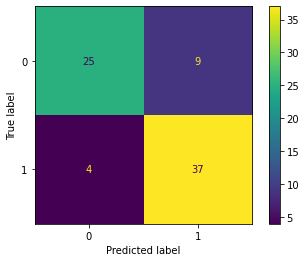

In [ ]:
plot_confusion_matrix(clf_best_rfc, X_test, y_test, values_format='d')
plt.grid(False)
plt.show()

In [ ]:
#Pacient 
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42) 


models = {'KNN':               KNeighborsClassifier(n_neighbors=3),  
          'Extra Tree':        ExtraTreesClassifier(n_estimators=200, random_state=0),  
          'Random Forest':     RandomForestClassifier(bootstrap=  False, criterion= "entropy",max_depth= 3,max_features= 'log2',min_samples_split= 3,n_estimators= 50),   
          'XGBoost':           XGBClassifier(model_learning_rate=0.001, model_max_depth=3,model_n_estimators=100), 
          'AdaBoost':          AdaBoostClassifier(n_estimators=100, random_state=0),  
          'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),  
          'Redes Neurais':     MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)}  

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")
  print('-----------------------------------')

Decision Tree
Acccuracy: 65.33333333333333%
Precision: 69.23076923076923%
Recall: 65.85365853658537%
F1: 67.5%
-----------------------------------
Extra Tree
Acccuracy: 85.33333333333334%
Precision: 87.5%
Recall: 85.36585365853658%
F1: 86.41975308641976%
-----------------------------------
Random Forest
Acccuracy: 84.0%
Precision: 82.22222222222221%
Recall: 90.2439024390244%
F1: 86.04651162790698%
-----------------------------------
XGBoost
Acccuracy: 82.66666666666667%
Precision: 81.81818181818183%
Recall: 87.8048780487805%
F1: 84.70588235294119%
-----------------------------------
AdaBoost
Acccuracy: 80.0%
Precision: 84.21052631578947%
Recall: 78.04878048780488%
F1: 81.0126582278481%
-----------------------------------
Gradient Boosting
Acccuracy: 81.33333333333333%
Precision: 82.92682926829268%
Recall: 82.92682926829268%
F1: 82.92682926829268%
-----------------------------------
Redes Neurais
Acccuracy: 76.0%
Precision: 84.84848484848484%
Recall: 68.29268292682927%
F1: 75.6756756756

# Serialization

In [ ]:
#Commando to save the model
pickle_out = open("Heartbetting.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [ ]:
# Open the model in streamlit
pickle_in = open('Heartbetting.pkl', 'rb') 
Heartbetting = pickle.load(pickle_in)